In [1]:
from remode import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
xt_count = [20, 21, 20, 18, 35, 24, 21, 28, 35]
xt_count = [0, 8, 20, 5, 2, 6, 2, 30, 0]
levels = 1+np.arange(len(xt_count))

Text(0.5, 0, '')

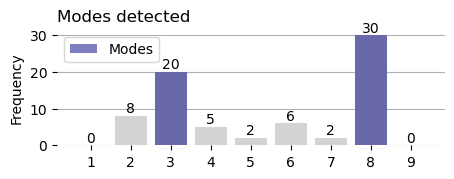

In [4]:
remode = ReMoDe(alpha=0.05, alpha_correction="none")
#xt_count = remode.format_data(xt)
result = remode.fit(xt_count, levels=levels)
fig = plt.figure(figsize=(5,1.5))
ax = fig.add_subplot(111)
remode.plot_maxima(ax)
# Perform robustness analysis
for i, value in zip(levels, xt_count):
    plt.annotate(str(value), (i, value), horizontalalignment="center", verticalalignment="bottom")
#plt.xticks([])
#plt.yticks([])
plt.xlabel("")

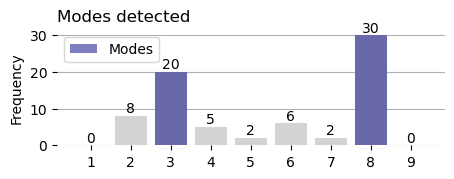

In [3]:
remode = ReMoDe(alpha=0.05, alpha_correction=2)
#xt_count = remode.format_data(xt)
result = remode.fit(xt_count, levels=levels)
fig = plt.figure(figsize=(5,1.5))
ax = fig.add_subplot(111)
remode.plot_maxima(ax)
# Perform robustness analysis
for i, value in zip(levels, xt_count):
    plt.annotate(str(value), (i, value), horizontalalignment="center", verticalalignment="bottom")
#plt.xticks([])
#plt.yticks([])
plt.xlabel("")
plt.savefig("/Users/garci061/Downloads/remode_ex.svg")

Robust until: 97.9591836734694 % data removal


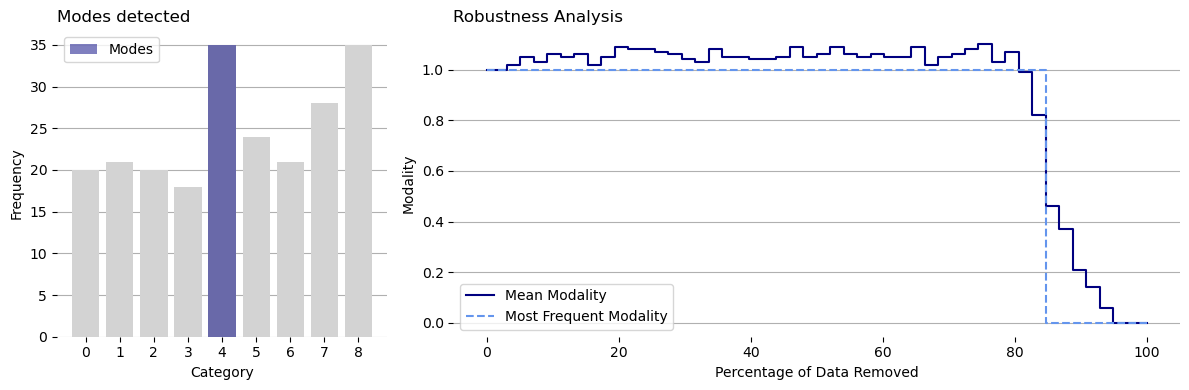

In [167]:
# Perform robustness analysis
robustness_info = remode.remode_robustness(iterations=100, percentage_steps=50)

# Output the robustness limit
print("Robust until:", robustness_info['robust_until'], "% data removal")


In [4]:
# #TODO
# - Add unit tests
# - Run benchmark 

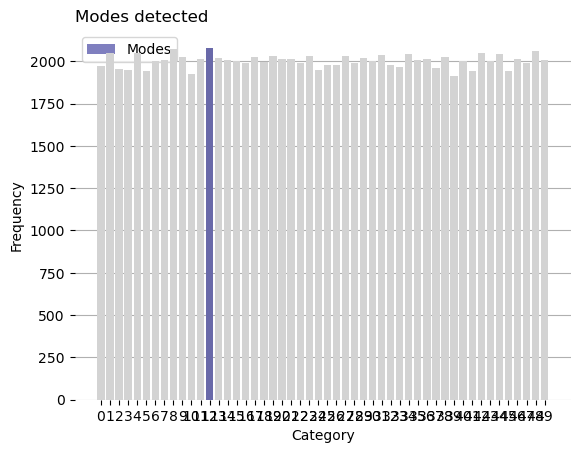

In [168]:
xt = [1974, 2051, 1954, 1951, 2046, 1945, 2001, 2006, 2073, 2027, 1927,
       2012, 2080, 2022, 2006, 2004, 1991, 2024, 1993, 2029, 2012, 2016,
       1989, 2032, 1947, 1975, 1977, 2032, 1992, 2019, 2001, 2039, 1975,
       1967, 2042, 2007, 2014, 1959, 2028, 1915, 2001, 1945, 2047, 1999,
       2040, 1945, 2011, 1990, 2061, 2007]

results = remode.fit(xt)
remode.plot_maxima()

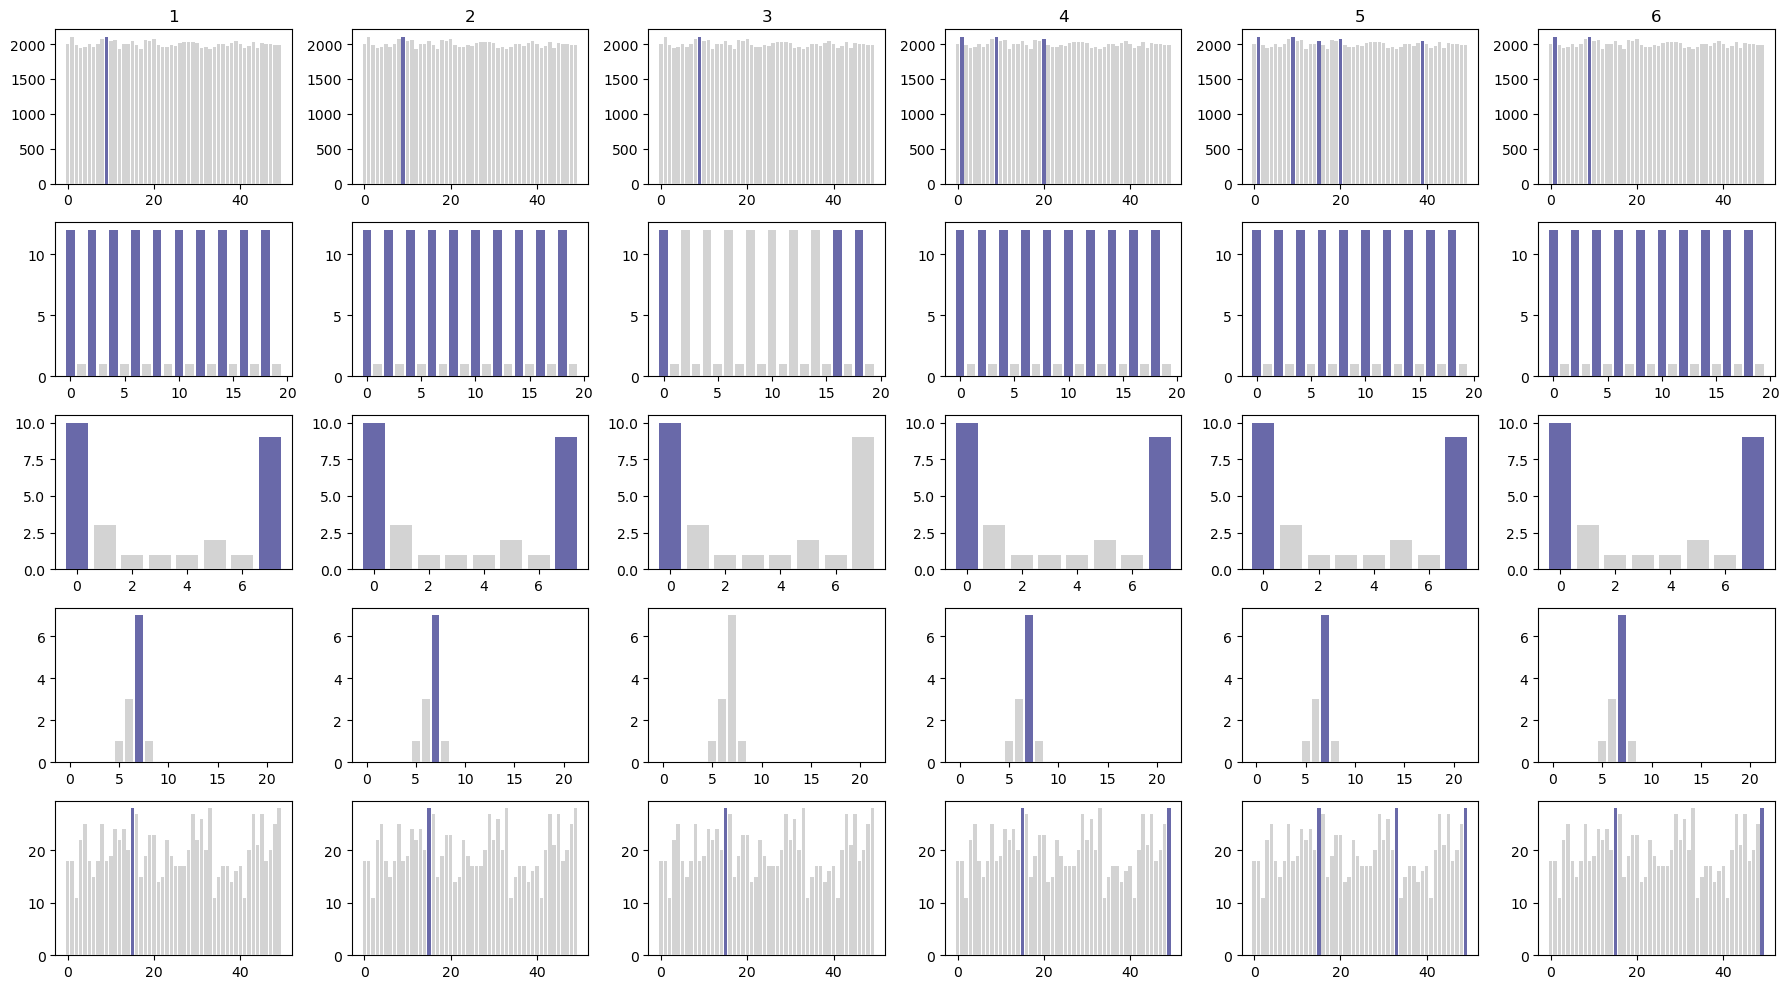

In [37]:

# Data generation and mode analysis
datasets = [
    [2005, 2105, 1982, 1946, 1961, 1999, 1964, 1996, 2069, 2107, 2048,
       2055, 1927, 1998, 2002, 2043, 1987, 1935, 2063, 2041, 2078, 1987,
       1960, 1961, 1985, 1967, 2020, 2027, 2028, 2031, 2020, 1938, 1957,
       1928, 1952, 1999, 1997, 1972, 2019, 2046, 2008, 1946, 1975, 2036,
       1939, 2022, 2002, 1995, 1981, 1991],
    [18, 18, 11, 22, 25, 18, 15, 18, 25, 18, 19, 24, 22, 24, 20, 28, 27,
       15, 19, 23, 23, 14, 15, 22, 19, 17, 17, 17, 20, 27, 22, 26, 20, 28,
       11, 15, 17, 17, 14, 16, 17, 11, 20, 27, 21, 27, 18, 20, 25, 28]    ,
    [12, 1]*10,
    [10, 3, 1, 1, 1, 2, 1, 9],
    [0,0,0,0,0,1,3,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0]

]
m = np.zeros((5, 6))

plt.figure(figsize=(18,10))
for i, data in enumerate(datasets):
    for j in range(6):
        remode = ReMode(alpha=0.05, alpha_correction=j+1)
        results = remode.fit(data)
        
        ax = plt.subplot(5,6,j+i*6+1)
        if i == 0:
            plt.title(str(j+1))
        remode.plot_maxima(ax, format_plot=False)
        

        m[i, j] = results["nr_of_modes"]
plt.tight_layout()

0.0 0.0010204081632653062 0.0 0.0010204081632653062
0.0 0.0010204081632653062 0.004205461075561773 0.0010204081632653062
0.1822506747380798 0.0010204081632653062 0.2769791511201113 0.0010204081632653062
0.008181003506865262 0.0010204081632653062 0.0 0.0010204081632653062
0.01215967820713761 0.0010204081632653062 0.36469591408919727 0.0010204081632653062
0.4600439909934781 0.0010204081632653062 0.015737299007000115 0.0010204081632653062
0.022763041556604784 0.0010204081632653062 0.03150395874905744 0.0010204081632653062
0.029453815825832022 0.0010204081632653062 0.0 0.0010204081632653062
0.12707335368646042 0.0010204081632653062 0.04765942489640744 0.0010204081632653062
0.3294702471246341 0.0010204081632653062 0.37734663420405873 0.0010204081632653062
0.11380129671889369 0.0010204081632653062 0.3277739734403698 0.0010204081632653062
0.36951539365878466 0.0010204081632653062 0.3019995079798747 0.0010204081632653062
0.06853712929919548 0.0010204081632653062 0.0 0.0010204081632653062
0.076

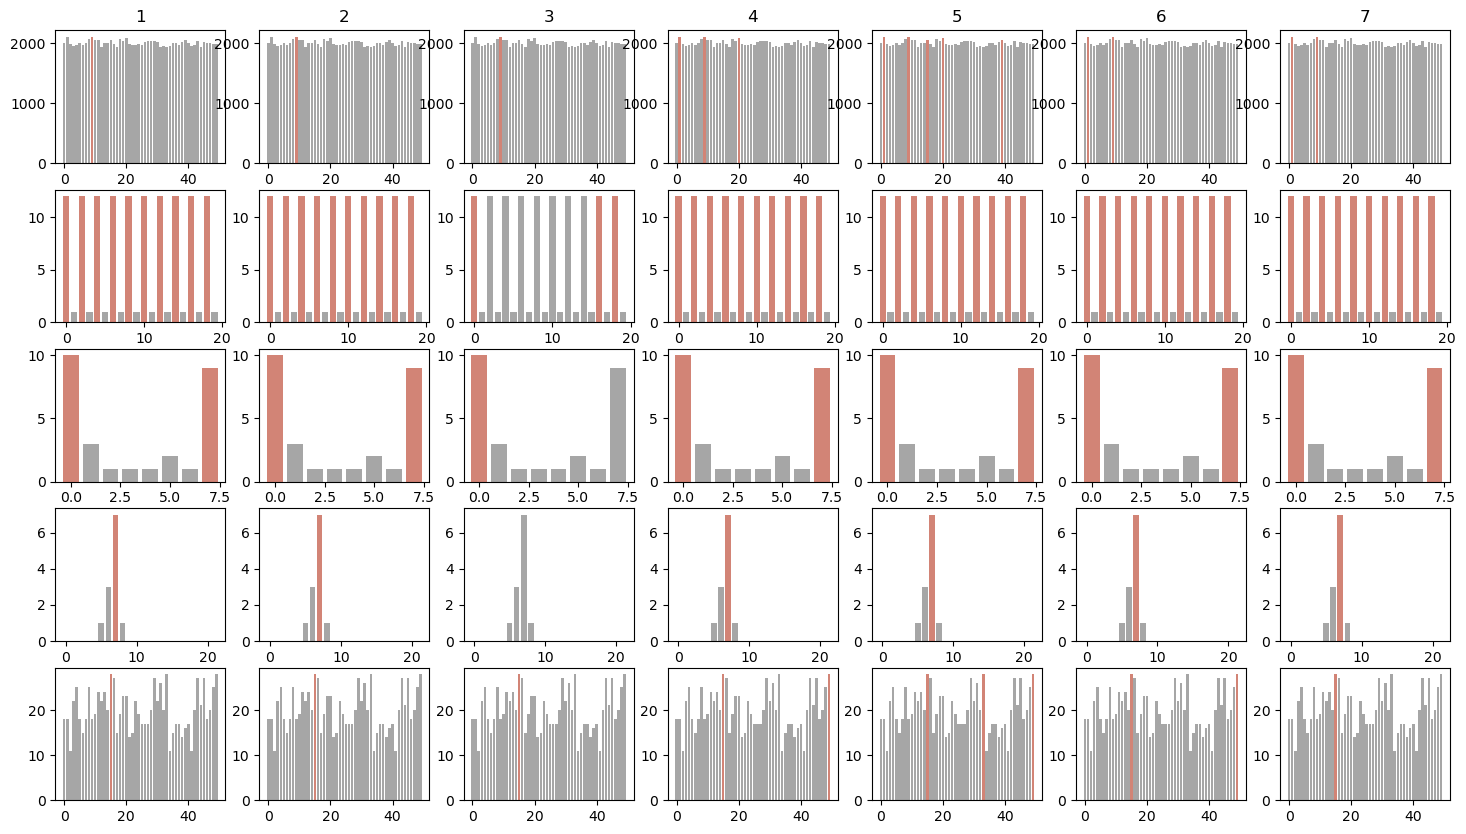

In [155]:

# Data generation and mode analysis
datasets = [
    [2005, 2105, 1982, 1946, 1961, 1999, 1964, 1996, 2069, 2107, 2048,
       2055, 1927, 1998, 2002, 2043, 1987, 1935, 2063, 2041, 2078, 1987,
       1960, 1961, 1985, 1967, 2020, 2027, 2028, 2031, 2020, 1938, 1957,
       1928, 1952, 1999, 1997, 1972, 2019, 2046, 2008, 1946, 1975, 2036,
       1939, 2022, 2002, 1995, 1981, 1991],
    [12, 1]*10,
    [10, 3, 1, 1, 1, 2, 1, 9],
    [0,0,0,0,0,1,3,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [18, 18, 11, 22, 25, 18, 15, 18, 25, 18, 19, 24, 22, 24, 20, 28, 27,
       15, 19, 23, 23, 14, 15, 22, 19, 17, 17, 17, 20, 27, 22, 26, 20, 28,
       11, 15, 17, 17, 14, 16, 17, 11, 20, 27, 21, 27, 18, 20, 25, 28]
]
m = np.zeros((5, 7))
plt.figure(figsize=(18,10))
for i, data in enumerate(datasets):
    for j in range(7):
            
        xt = create_data(data, format_raw=False, levels=None)
        if j != 6:
            results = remode(xt, check=False, alpha_correction=j+1, f_sign_test=fisher_test, bonferroni=False)
        else:
            results = remode(xt, check=False, alpha_correction=-9, f_sign_test=fisher_test, bonferroni=True)

        plt.subplot(5,7,j+i*7+1)
        if i == 0:
            plt.title(str(j+1))
        plot_xt(results["modes"], xt)
        

        m[i, j] = results["nr_of_modes"]


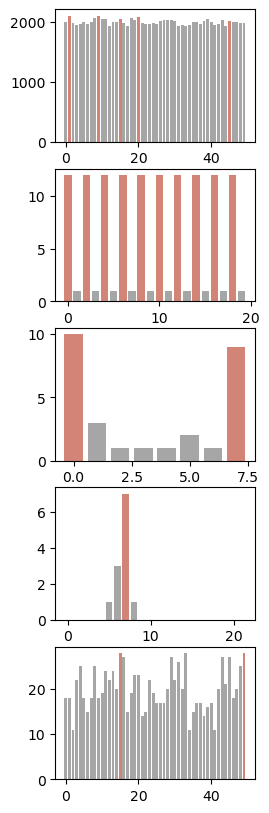

In [119]:


m = np.zeros((5, 6))
plt.figure(figsize=(18,10))
for i, data in enumerate(datasets):
    for j in range(1):
            
        xt = create_data(data, format_raw=False, levels=None)
        results = remode(xt, check=False, alpha_correction=j+1, f_sign_test=fisher_test, bonferroni=True)
        plt.subplot(5,6,j+i*6+1)
        plot_xt(results["modes"], xt)
        

        m[i, j] = results["nr_of_modes"]


In [35]:
xt

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 7]

In [36]:
results

{'nr_of_modes': 0,
 'modes': array([], dtype=float64),
 'xt': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 7],
 'alpha': 0.05,
 'alpha_correction': 1}

In [40]:
xt = [1, 2]*10 

array([1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2])

In [45]:
xnp.bincount(x, minlength=len(xt))

array([ 0,  1,  1,  2,  3,  3,  4,  5,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       15, 16, 17, 17, 18, 19, 19])

In [1]:
import numpy as np
import pytest
from remode import ReMoDe, perform_fisher_test, perform_binomial_test

def test_perform_fisher_test():
    x = np.array([10, 20, 30, 40, 50])
    candidate = 2
    left_min = 1
    right_min = 3
    p_left, p_right = perform_fisher_test(x, candidate, left_min, right_min)
    assert isinstance(p_left, float)
    assert isinstance(p_right, float)
    assert np.isclose(p_left, 0.08139159420716555)
    assert np.isclose(p_right, 0.9335662053784756)

def test_perform_binomial_test():
    x = np.array([10, 20, 30, 40, 50])
    candidate = 2
    left_min = 1
    right_min = 3
    p_left, p_right = perform_binomial_test(x, candidate, left_min, right_min)
    assert isinstance(p_left, float)
    assert isinstance(p_right, float)
    assert np.isclose(p_left, 0.10131937553227033)
    assert np.isclose(p_right, 0.9058918984884862)

def test_remode_initialization():
    remode = ReMoDe(alpha=0.05, alpha_correction="none", statistical_test=perform_fisher_test)
    assert remode.alpha == 0.05
    assert remode._create_alpha_correction(10) == 0.05
    assert remode.statistical_test == perform_fisher_test

    remode = ReMoDe(alpha=0.05, alpha_correction="max_modes", statistical_test=perform_fisher_test)
    assert remode._create_alpha_correction(10) == 0.01
    assert remode.statistical_test == perform_fisher_test



def test_format_data():
    remode = ReMoDe()
    xt = [1, 2, 2, 3, 3, 3]
    formatted_data = remode.format_data(xt)
    assert np.array_equal(formatted_data, np.array([1, 2, 3]))


In [7]:
test_find_maxima()

{'nr_of_modes': 1, 'modes': array([2]), 'xt': array([ 1,  2, 30,  2,  1]), 'alpha': 0.016666666666666666}
[2]
{'nr_of_modes': 1, 'modes': array([0]), 'xt': array([30,  2,  1,  2,  1]), 'alpha': 0.016666666666666666}
[]


AssertionError: 

In [6]:

def test_find_maxima():
    remode = ReMoDe()
    x = np.array([1, 2, 30, 2, 1])
    maxima = remode.fit(x)
    print(maxima)
    assert np.array_equal(maxima["modes"], np.array([2]))

    x = np.array([30, 2, 1, 2, 1])
    maxima = remode.fit(x)
    print(maxima)
    assert np.array_equal(maxima["modes"], np.array([0]))

    x = np.array([30, 2, 1, 2, 30])
    maxima = remode.fit(x)
    print(maxima)
    assert np.array_equal(maxima["modes"], np.array([0, 4]))



def test_fit():
    remode = ReMoDe()
    xt = np.array([1, 2, 3, 2, 1])
    result = remode.fit(xt)
    assert result["nr_of_modes"] == 1
    assert np.array_equal(result["modes"], np.array([2]))

def test_jackknife():
    remode = ReMoDe()
    remode.xt = np.array([1, 2, 3, 2, 1])
    resampled_data = remode._jackknife(20)
    assert len(resampled_data) == 5

def test_evaluate_robustness():
    remode = ReMoDe()
    remode.xt = np.array([1, 2, 3, 2, 1])
    remode.modes = np.array([2])
    result = remode.evaluate_robustness(iterations=10, percentage_steps=5)
    assert "jacknife_df" in result
    assert "robust_until" in result